<h2 style="color:green">Machine Learning Model Project for the HR Department for Employee Retention/Attrition Prediction.</h2>
 
1. Carry out exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
# read the csv dataset file

df = pd.read_csv(r"C:\Users\user\Downloads\Machine learning model\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# shape of the dataset to know how many data entry and columns of the dataset
df.shape

(14999, 10)

In [4]:
# check the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# know the unique binary values that represent the employee retention and attrition in the left column
df.left.unique()

array([1, 0], dtype=int64)

In [6]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [3]:
# filter the eployees that stayed
retained = df[df.left==0]
retained.shape

(11428, 10)

In [4]:
# filter the employees that left the firm
left = df[df.left==1]
left.shape

(3571, 10)

#### To get the Average of the numeric columns

In [31]:
# droping the Department and salary column as the contained test
numeric_val = df.drop(['Department','salary'],axis = 1)
numeric_val

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [11]:
numeric_val.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

#### plot bar charts showing impact of employee salaries on retention

**Impact of salary on employee retention**

In [32]:
salary_retention = df.groupby('salary')['left'].value_counts(normalize=True).unstack()
salary_retention

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


<Figure size 1000x600 with 0 Axes>

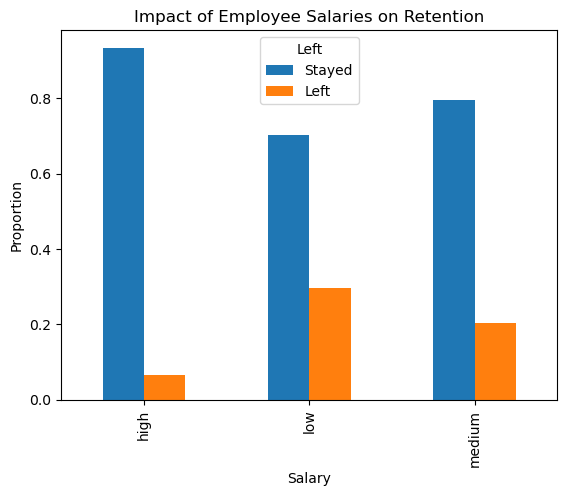

In [33]:
#plotting

plt.figure(figsize=(10, 6))
salary_retention.plot(kind='bar')
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary')
plt.ylabel('Proportion')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

Above bar chart shows employees with high salaries are likely to not leave the company

#### plot bar charts showing correlation between department and employee retention.


In [14]:
department_retention = df.groupby('Department')['left'].value_counts(normalize=True).unstack()
department_retention

left,0,1
Department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


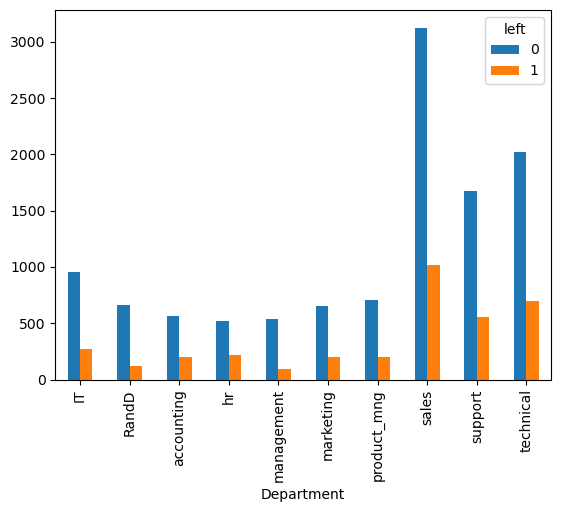

In [15]:
#plotting

pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.show()

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:green">From the data analysis so far i can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

#### Now Build a logistic regression using parameters i just narrowed down above.

In [16]:
# extracting the columns we are using from the main dataframe

subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Tacking the salary column as it contained text using ***one hot encoding*** to convert the categorical text to ***binary number***

In [35]:
# create a dummy variable using pandas
dummies = pd.get_dummies(subdf.salary,prefix ='salary').astype(int)
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [36]:
# merge the generated dummy variable to the subdf

merged = pd.concat([subdf,dummies],axis = 1)
merged.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [37]:
# drop salary column as it contained text 

df_with_dummies = merged.drop(['salary'],axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


##### Create our X and Y variable for our model training

In [20]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [21]:
y = df.left
y.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

#### Split our dataset for the train and test which is a good strategy

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [23]:
# import our logistic regression model and create our logisticRegression object

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
# To do our prediction
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Measure the accuracy of the model.

In [30]:
model.score(X_test,y_test)

0.7815238095238095